In [11]:
import numpy as np
import statsmodels.tsa.stattools as st
import statsmodels.graphics.tsaplots as graph_tools
import matplotlib.pyplot as plt

In [12]:
Fs=200 # Sampling freq
nfft =512
t=np.arange(0,0.296,1/Fs)
f = 20 #
x = np.cos(2*np.pi*f*t)


In [13]:
#x[40:210]=0.0

In [18]:
y=np.fft.fft(x, n=nfft)
y=abs(y**2)
y=(y-y.min())
y=y/y.max()

C:\Users\FNasiri\AppData\Local\Continuum\anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.fft(a, n, axis)


In [19]:
#y.shape

In [20]:
freq_range=np.linspace(0,nfft/2,nfft/2)*Fs/nfft

C:\Users\FNasiri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


(0, 0.3)

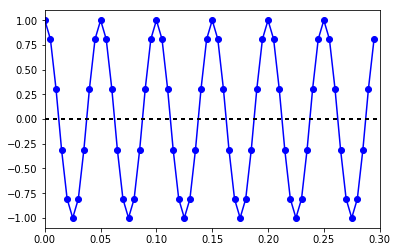

In [21]:
plt.plot(t,x,'b-o')
#lt.grid(b=True)
plt.plot([0, 0.3],[0, 0], 'k-', lw=2,dashes=[2, 2]);
plt.xlim(0,0.3)

(0, 100)

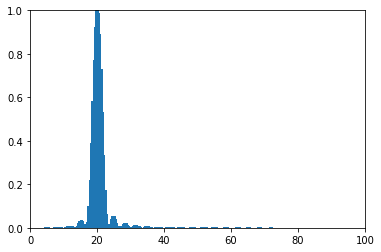

In [22]:
plt.bar(freq_range, y[0:256], width=1)
plt.ylim(0,1)
plt.xlim(0,100)

In [23]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [134]:
#x.reshape(1,-1)[0]

In [26]:
new_series=diff(x.reshape(1,-1)[0],k_diff=0, k_seasonal_diff=2, seasonal_periods=10,)
test=adfuller(new_series, maxlag=new_series.shape[0]-2)

print(test[1]*100)

1.1102181520793147e-05


C:\Users\FNasiri\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:846: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


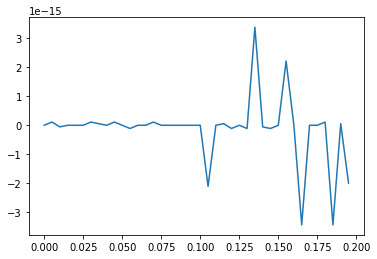

In [27]:
plt.plot(t[0:len(new_series)],new_series)

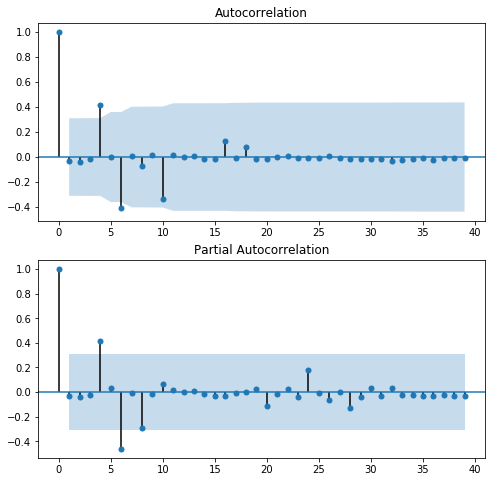

In [28]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(8,8))
plot_acf(x=new_series, ax=ax1);
plot_pacf(x=new_series, ax=ax2, method='ldb');

In [30]:
model=SARIMAX(x.reshape(1,-1)[0], order=(0, 0, 0), seasonal_order=(0, 0, 2, 10), 
              enforce_invertibility=False, enforce_stationarity=False)
start_params = [0, 0, 1.]
res=model.fit(start_params)
pred=res.predict()

steps=1

forecast=res.forecast(steps=steps)

C:\Users\FNasiri\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


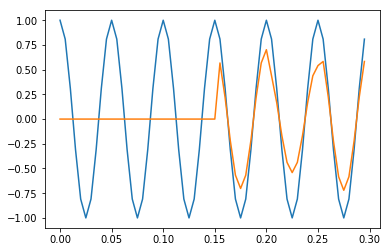

In [31]:

plt.plot(t,x)
plt.plot(t,pred)
